# Data Description
1. List_of_Station_Chicago.csv scraped from Wikipedia 
2. use *opencage.geocoder* to get lat, lng
3. "station.csv" is the cleaned combining 1 and 2 
4. Using Foursquare API to get Get top categories , category.csv contains three tiers of category for analysis

In [1]:
# !pip install sklearn
import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re


### List of stations and geographical coordinates


Data downloaded from wikipedia
https://en.wikipedia.org/wiki/List_of_Chicago_%22L%22_stations

In [2]:
stations=pd.read_csv("List_of_Station_Chicago.csv")
stations.head()

Station Lines                           Transfers        Location  \
0          O'Hare  Blue  O'Hare: ATS Airport Transit System          O'Hare   
1        Rosemont  Blue                                   —        Rosemont   
2      Cumberland  Blue                                   —          O'Hare   
3          Harlem  Blue                                   —    Norwood Park   
4  Jefferson Park  Blue                        Metra: UP-NW  Jefferson Park   

                  Opened          Structure  
0  September 3, 1984[12]        Underground  
1  February 27, 1983[13]  Expressway median  
2  February 27, 1983[13]  Expressway median  
3  February 27, 1983[13]  Expressway median  
4   February 1, 1970[14]  Expressway median

In [3]:
stations.Lines.value_counts()

Blue                              33
Red                               29
Green                             22
Pink                              11
Brown                             11
Purple                             8
Orange                             7
Brown Purple                       6
Brown Green Orange Pink Purple     4
Brown Orange Pink Purple           4
Green Pink                         3
Yellow                             2
Brown Purple Red                   2
Red Purple                         1
Green Orange                       1
Red Purple  Yellow                 1
Name: Lines, dtype: int64

In [4]:
# !pip3 install opencage
# use alternative geocoder for getting lat lng 
from opencage.geocoder import OpenCageGeocode
key = '20b19d9ca52c4af8b4ee86a53b693aa6'
geocoder = OpenCageGeocode(key)

In [5]:
# station_dict={}
# import time
# start = time.time()

# for i, j in zip(stations.Station, stations.Location):
#     address = j + ', ' + 'Chicago, Illinois,United States'
#     location = geocoder.geocode(address)
#     latlng = location[0]['geometry']
#     station_dict[i]=latlng
#     print(i,latlng,str(time.time()-start)+'s')
# station_dict

O'Hare {'lat': 41.973101, 'lng': -87.9067679} 3.7447617053985596s
Rosemont {'lat': 41.995343, 'lng': -87.7337447} 15.120142698287964s
Cumberland {'lat': 41.973101, 'lng': -87.9067679} 17.906909942626953s
Harlem {'lat': 41.9855895, 'lng': -87.8005817} 21.244351863861084s
Jefferson Park {'lat': 41.9697375, 'lng': -87.7631179} 26.831483840942383s
Montrose {'lat': 41.953365, 'lng': -87.7364471} 62.180675745010376s
Irving Park {'lat': 41.953365, 'lng': -87.7364471} 71.80925798416138s
Addison {'lat': 41.953365, 'lng': -87.7364471} 74.99111294746399s
Belmont {'lat': 41.9389208, 'lng': -87.711168} 78.75988292694092s
Logan Square {'lat': 41.9285683, 'lng': -87.7067931} 81.94721364974976s
California {'lat': 41.925221, 'lng': -87.7013096} 103.98984980583191s
Western {'lat': 41.925221, 'lng': -87.7013096} 107.89699363708496s
Damen {'lat': 41.9078018, 'lng': -87.6781551} 121.80561184883118s
Division {'lat': 41.905809, 'lng': -87.672125} 125.76952171325684s
Chicago {'lat': 41.9014213, 'lng': -87.686

Berwyn {'lat': 41.9833689, 'lng': -87.6639516} 611.6298229694366s
Argyle {'lat': 41.9732234, 'lng': -87.6587651} 619.8557238578796s
Lawrence {'lat': 41.9666299, 'lng': -87.6555458} 622.9298779964447s
Wilson  Ⓣ {'lat': 41.9666299, 'lng': -87.6555458} 626.3096237182617s
Sheridan {'lat': 41.94705, 'lng': -87.6554288} 629.5842196941376s
Addison {'lat': 41.947022, 'lng': -87.6564773} 638.9026448726654s
North/Clybourn {'lat': 41.9000327, 'lng': -87.6344975} 650.2691369056702s
Clark/Division {'lat': 41.9000327, 'lng': -87.6344975} 651.9580228328705s
Chicago {'lat': 41.9000327, 'lng': -87.6344975} 654.0718188285828s
Grand {'lat': 41.890808, 'lng': -87.611113} 657.2323429584503s
Lake  Ⓣ {'lat': 41.8788844, 'lng': -87.6271806} 665.7333438396454s
Monroe {'lat': 41.8816094, 'lng': -87.6294574} 668.3359048366547s
Jackson  Ⓣ {'lat': 41.8788844, 'lng': -87.6271806} 672.0827038288116s
Harrison {'lat': 41.8617846, 'lng': -87.6261213} 673.801837682724s
Roosevelt  Ⓣ {'lat': 41.8566999, 'lng': -87.6247738

{"O'Hare": {'lat': 41.973101, 'lng': -87.9067679},
 'Rosemont': {'lat': 41.995343, 'lng': -87.7337447},
 'Cumberland': {'lat': 41.973101, 'lng': -87.9067679},
 'Harlem': {'lat': 41.727329, 'lng': -87.616704},
 'Jefferson Park': {'lat': 41.9697375, 'lng': -87.7631179},
 'Montrose': {'lat': 41.9655913, 'lng': -87.6667239},
 'Irving Park': {'lat': 41.9561073, 'lng': -87.6791596},
 'Addison': {'lat': 41.947022, 'lng': -87.6564773},
 'Belmont': {'lat': 41.9389208, 'lng': -87.711168},
 'Logan Square': {'lat': 41.9285683, 'lng': -87.7067931},
 'California': {'lat': 41.861876, 'lng': -87.647786},
 'Western': {'lat': 41.8541996, 'lng': -87.6656086},
 'Damen': {'lat': 41.951758, 'lng': -87.7107659},
 'Division': {'lat': 41.905809, 'lng': -87.672125},
 'Chicago': {'lat': 41.9000327, 'lng': -87.6344975},
 'Grand': {'lat': 41.890808, 'lng': -87.611113},
 'Clark/Lake[b]  Ⓣ': {'lat': 41.8788844, 'lng': -87.6271806},
 'Washington Ⓣ': {'lat': 41.8788844, 'lng': -87.6271806},
 'Monroe': {'lat': 41.88160

In [6]:
# latlng=pd.DataFrame.from_dict(station_dict,orient='index').reset_index()
# latlng.columns=['Station','latitude','longitude']
# station_new=pd.merge(stations,latlng,how='left', on=['Station'])
# station_new

Station   Lines                           Transfers  \
0             O'Hare    Blue  O'Hare: ATS Airport Transit System   
1           Rosemont    Blue                                   —   
2         Cumberland    Blue                                   —   
3             Harlem    Blue                                   —   
4     Jefferson Park    Blue                        Metra: UP-NW   
..               ...     ...                                 ...   
140             79th     Red                                   —   
141             87th     Red                                   —   
142    95th/Dan Ryan     Red                                   —   
143  Dempster–Skokie  Yellow                                   —   
144    Oakton–Skokie  Yellow                                   —   

           Location                  Opened          Structure   latitude  \
0            O'Hare   September 3, 1984[12]        Underground  41.973101   
1          Rosemont   February 27, 1983[13]  Expressway median  41.995343   
2            O'Hare   February 27, 1983[13]  Expressway median  41.973101   
3      Norwood Park   February 27, 1983[13]  Expressway median  41.727329   
4    Jefferson Park    February 1, 1970[14]  Expressway median  41.969738   
..              ...                     ...                ...        ...   
140         Chatham  September 28, 1969[68]  Expressway median  41.741145   
141         Chatham  September 28, 1969[68]  Expressway median  41.741145   
142        Roseland  September 28, 1969[68]  Expressway median  41.701979   
143          Skokie      March 28, 1925[69]           At-grade  42.301387   
144          Skokie      March 28, 1925[70]           At-grade  42.306497   

     longitude  
0   -87.906768  
1   -87.733745  
2   -87.906768  
3   -87.616704  
4   -87.763118  
..         ...  
140 -87.612548  
141 -87.612548  
142 -87.625881  
143 -87.871313  
144 -87.872476  

[145 rows x 8 columns]

In [7]:
# station_new.to_csv('station_latlng.csv')

In [59]:
station_new=pd.read_csv('station_latlng.csv')  # save data
station_new

Unnamed: 0          Station   Lines                           Transfers  \
0             0           O'Hare    Blue  O'Hare: ATS Airport Transit System   
1             1         Rosemont    Blue                                   —   
2             2       Cumberland    Blue                                   —   
3             3           Harlem    Blue                                   —   
4             4   Jefferson Park    Blue                        Metra: UP-NW   
..          ...              ...     ...                                 ...   
140         140             79th     Red                                   —   
141         141             87th     Red                                   —   
142         142    95th/Dan Ryan     Red                                   —   
143         143  Dempster–Skokie  Yellow                                   —   
144         144    Oakton–Skokie  Yellow                                   —   

           Location                  Opened          Structure   latitude  \
0            O'Hare   September 3, 1984[12]        Underground  41.973101   
1          Rosemont   February 27, 1983[13]  Expressway median  41.995343   
2            O'Hare   February 27, 1983[13]  Expressway median  41.973101   
3      Norwood Park   February 27, 1983[13]  Expressway median  41.727329   
4    Jefferson Park    February 1, 1970[14]  Expressway median  41.969738   
..              ...                     ...                ...        ...   
140         Chatham  September 28, 1969[68]  Expressway median  41.741145   
141         Chatham  September 28, 1969[68]  Expressway median  41.741145   
142        Roseland  September 28, 1969[68]  Expressway median  41.701979   
143          Skokie      March 28, 1925[69]           At-grade  42.301387   
144          Skokie      March 28, 1925[70]           At-grade  42.306497   

     longitude  
0   -87.906768  
1   -87.733745  
2   -87.906768  
3   -87.616704  
4   -87.763118  
..         ...  
140 -87.612548  
141 -87.612548  
142 -87.625881  
143 -87.871313  
144 -87.872476  

[145 rows x 9 columns]

Neighbourhood df download from wiki
https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

In [5]:
neighbours = pd.read_csv('List_of_neighborhoods_in_Chicago.csv')
neighbours.head()

Neighborhood  Community area
0      Albany Park     Albany Park
1  Altgeld Gardens       Riverdale
2    Andersonville       Edgewater
3   Archer Heights  Archer Heights
4    Armour Square   Armour Square

In [14]:
# neig_dict={}
# import time
# start = time.time()

# for i in neighbours.Neighborhood:
#     address = i + ', ' + 'Chicago, Illinois,United States'
#     location = geocoder.geocode(address)
#     latlng = location[0]['geometry']
#     neig_dict[i]=latlng
#     print(i,latlng,str(time.time()-start)+'s')
# neig_dict

Albany Park {'lat': 41.9719367, 'lng': -87.7161739} 3.2264668941497803s
Altgeld Gardens {'lat': 41.6548637, 'lng': -87.6004462} 11.95927095413208s
Andersonville {'lat': 41.9771393, 'lng': -87.6692734} 14.691755771636963s
Archer Heights {'lat': 41.8114215, 'lng': -87.7261651} 17.756582975387573s
Armour Square {'lat': 41.8400333, 'lng': -87.633107} 19.730741024017334s
Ashburn {'lat': 41.7475332, 'lng': -87.7111628} 25.73625087738037s
Ashburn Estates {'lat': 41.88531, 'lng': -87.62213} 28.615612030029297s
Auburn Gresham {'lat': 41.7433872, 'lng': -87.6560416} 32.03937101364136s
Avalon Park {'lat': 41.7450346, 'lng': -87.5886584} 34.97990107536316s
Avondale {'lat': 41.9389208, 'lng': -87.711168} 41.917022943496704s
Avondale Gardens {'lat': 41.9389208, 'lng': -87.711168} 44.763060092926025s
Back of the Yards {'lat': 41.8075332, 'lng': -87.6661628} 52.336265087127686s
Belmont Central {'lat': 41.9397964, 'lng': -87.6533276} 54.78774094581604s
Belmont Gardens {'lat': 41.9397964, 'lng': -87.653

Lincoln Park {'lat': 41.9402976, 'lng': -87.6381171} 498.8368000984192s
Lincoln Square {'lat': 41.9759898, 'lng': -87.6896163} 503.5835931301117s
Lithuanian Plaza {'lat': 41.6869288, 'lng': -87.7306849} 506.39634108543396s
Little Italy {'lat': 41.873733, 'lng': -87.658413} 509.4529318809509s
Little Village {'lat': 41.861876, 'lng': -87.647786} 512.9158427715302s
Logan Square {'lat': 41.925221, 'lng': -87.7013096} 521.0249030590057s
Longwood Manor {'lat': 41.6903981, 'lng': -87.6721901} 525.719979763031s
The Loop {'lat': 41.8788844, 'lng': -87.6271806} 528.0787301063538s
Lower West Side {'lat': 41.8476197, 'lng': -87.6717742} 530.8883669376373s
Loyola {'lat': 42.0013525, 'lng': -87.6613062} 535.3763189315796s
Magnificent Mile {'lat': 41.8945229, 'lng': -87.624228} 539.1864879131317s
Margate Park {'lat': 41.972484, 'lng': -87.650708} 540.9576017856598s
Marquette Park {'lat': 41.7685506, 'lng': -87.7028826} 542.4961400032043s
Marshall Square {'lat': 41.8522013, 'lng': -87.6940542} 544.011

West Englewood {'lat': 41.7780891, 'lng': -87.6667177} 942.7696659564972s
West Garfield Park {'lat': 41.8805878, 'lng': -87.7292227} 946.9433591365814s
West Humboldt Park {'lat': 41.9057668, 'lng': -87.7041737} 950.1975078582764s
West Lakeview {'lat': 41.9439185, 'lng': -87.6540759} 959.041589975357s
West Lawn {'lat': 41.7728107, 'lng': -87.722275} 964.7815239429474s
West Loop {'lat': 41.8823318, 'lng': -87.6385777} 966.5102219581604s
West Morgan Park {'lat': 41.6903117, 'lng': -87.6667156} 968.3290750980377s
West Pullman {'lat': 41.6750456, 'lng': -87.637823} 972.8733577728271s
West Ridge {'lat': 42.0035482, 'lng': -87.6962426} 976.9606161117554s
West Rogers Park {'lat': 42.0105314, 'lng': -87.6707482} 980.0367429256439s
West Town {'lat': 41.9014213, 'lng': -87.6861661} 983.0497689247131s
West Woodlawn {'lat': 41.7794786, 'lng': -87.599493} 986.5972719192505s
Wicker Park {'lat': 41.9078018, 'lng': -87.6781551} 991.178827047348s
Wildwood {'lat': 42.0046908, 'lng': -87.7759245} 993.2226

{'Albany Park': {'lat': 41.9719367, 'lng': -87.7161739},
 'Altgeld Gardens': {'lat': 41.6548637, 'lng': -87.6004462},
 'Andersonville': {'lat': 41.9771393, 'lng': -87.6692734},
 'Archer Heights': {'lat': 41.8114215, 'lng': -87.7261651},
 'Armour Square': {'lat': 41.8400333, 'lng': -87.633107},
 'Ashburn': {'lat': 41.7475332, 'lng': -87.7111628},
 'Ashburn Estates': {'lat': 41.88531, 'lng': -87.62213},
 'Auburn Gresham': {'lat': 41.7433872, 'lng': -87.6560416},
 'Avalon Park': {'lat': 41.7450346, 'lng': -87.5886584},
 'Avondale': {'lat': 41.9389208, 'lng': -87.711168},
 'Avondale Gardens': {'lat': 41.9389208, 'lng': -87.711168},
 'Back of the Yards': {'lat': 41.8075332, 'lng': -87.6661628},
 'Belmont Central': {'lat': 41.9397964, 'lng': -87.6533276},
 'Belmont Gardens': {'lat': 41.9397964, 'lng': -87.6533276},
 'Belmont Heights': {'lat': 41.940104, 'lng': -87.640367},
 'Belmont Terrace': {'lat': 41.9397964, 'lng': -87.6533276},
 'Beverly': {'lat': 41.7181532, 'lng': -87.6717674},
 'Beve

In [16]:
# latlng=pd.DataFrame.from_dict(neig_dict,orient='index').reset_index()
# latlng.columns=['Neighborhood','latitude','longitude']

In [17]:
# neighbours_new=pd.merge(neighbours,latlng,how='left', on=['Neighborhood'])

In [18]:
# neighbours_new.head()

Neighborhood  Community area   latitude  longitude
0      Albany Park     Albany Park  41.971937 -87.716174
1  Altgeld Gardens       Riverdale  41.654864 -87.600446
2    Andersonville       Edgewater  41.977139 -87.669273
3   Archer Heights  Archer Heights  41.811422 -87.726165
4    Armour Square   Armour Square  41.840033 -87.633107

In [3]:
# station_new.to_csv("station.csv")
# neighbours_new.to_csv("neighbours.csv")
# reading saved data
station_new = pd.read_csv("station.csv")
neighbours_new = pd.read_csv("neighbours.csv")

In [4]:
neighbours_new.shape

(246, 5)

In [5]:
# CLIENT_ID="1QWBEEEJMMQ1TD2ZOOO31GHSEWRJ24N3Y40EHQR2ZEH0PI4A"
# CLIENT_SECRET="KXTQUUEMPXA1XCMWSEPJ1PN05PCHU0NYNFBHR51LCRA5V3JD"
VERSION="20191222"
CLIENT_ID = 'WGY32GYMOR10DO0A4VJZ3YDJML5H4PFBONGBH0SNCCNF2QR0' # confidential
CLIENT_SECRET= 'LIUOD1RYNQI5QA1AVDK302Z5ENCRIBZNAMY2GYHORMV1RWAB' # confidential
LIMIT=80

In [6]:
#create map of Chicago with all neighbourhood
# 41.8781° N, 87.6298° W
map_chicago_neig = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for neighborhood, lat, lng in zip(neighbours_new['Neighborhood'], neighbours_new['latitude'],neighbours_new['longitude']):
    folium.Circle(
        [lat,lng],
        popup=neighborhood,
        radius=20,
        color='red'
    ).add_to(map_chicago_neig)  
map_chicago_neig

In [10]:
#create map of Chicago with all station
# 41.8781° N, 87.6298° W
map_chicago_station = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for station, lat, lng in zip(station_new['Station'], station_new['latitude'],station_new['longitude']):
    folium.Circle(
        [lat,lng],
        popup=station,
        radius=20,
        color='blue'
    ).add_to(map_chicago_station)  
map_chicago_station

### Methodology
Using Foursquare API to get Get top categories and explore

In [7]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url,timeout=10).json()

In [8]:
len(results['response']['categories'])

10

In [9]:
categories_list = []
# print the top 5 categories and their IDs and add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
# print_categories(results['response']['categories'], 0, 0)
# categories_list = categories_list[:5]

In [10]:
categories_list

[]

In [15]:
def get_venues_count(coord, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                coord,
                radius,
                categoryId)
    return requests.get(explore_url, timeout=10).json()['response']['totalResults']


In [16]:
#Create new dataframe to store venues data
station_venues_df = station_new.copy()
for c in categories_list:
    station_venues_df[c[0]] = 0

station_venues_df.head()

Unnamed: 0  Unnamed: 0.1         Station Lines  \
0           0             0          O'Hare  Blue   
1           1             1        Rosemont  Blue   
2           2             2      Cumberland  Blue   
3           3             3          Harlem  Blue   
4           4             4  Jefferson Park  Blue   

                            Transfers        Location                 Opened  \
0  O'Hare: ATS Airport Transit System          O'Hare  September 3, 1984[12]   
1                                   —        Rosemont  February 27, 1983[13]   
2                                   —          O'Hare  February 27, 1983[13]   
3                                   —    Norwood Park  February 27, 1983[13]   
4                        Metra: UP-NW  Jefferson Park   February 1, 1970[14]   

           Structure   latitude  longitude  
0        Underground  41.973101 -87.906768  
1  Expressway median  41.995343 -87.733745  
2  Expressway median  41.973101 -87.906768  
3  Expressway median  41.727329 -87.616704  
4  Expressway median  41.969738 -87.763118

In [17]:
# #Request number of venues, store result as CSV
# import time
# for i, row in station_venues_df.iterrows():
#         try:
#             for c in categories_list: 
#                 coord = str(station_venues_df.latitude.iloc[i])+","+ str(station_venues_df.longitude.iloc[i])
#                 station_venues_df.loc[i, c[0]] = get_venues_count(coord, radius=1000, categoryId=c[1])
#                 print(c, station_venues_df.loc[i, c[0]])
#                 station_venues_df.to_csv('station_venues.csv')
#         except:
#             print("Connection refused by the server..")
#             print("Let me sleep for 5 seconds")
#             print("ZZzzzz...")
#             time.sleep(100)
#             print("Was a nice sleep, now let me continue...")
#             continue

In [11]:
station_venues_df = pd.read_csv('station_venues.csv')
station_venues_df = station_venues_df.drop(['Opened','Transfers',
                        'Outdoors & Recreation',
                        'Professional & Other Places',
                        'Residence','Shop & Service',
                        'Travel & Transport'
                       ], axis =1)

Find lication and station with the largest number of "Arts & Entertainment"

In [12]:
station_venues_df[station_venues_df['Arts & Entertainment'] == max(station_venues_df['Arts & Entertainment'])]

Station                           Lines  Location  \
18                Monroe                            Blue  The Loop   
52   Washington/Wells  Ⓣ        Brown Orange Pink Purple  The Loop   
54     LaSalle/Van Buren        Brown Orange Pink Purple  The Loop   
56        Adams/Wabash Ⓣ  Brown Green Orange Pink Purple  The Loop   
57    Washington/​Wabash  Brown Green Orange Pink Purple  The Loop   
130               Monroe                             Red  The Loop   

       Structure   latitude  longitude  Arts & Entertainment  \
18   Underground  41.881609 -87.629457                   111   
52      Elevated  41.881609 -87.629457                   111   
54      Elevated  41.881609 -87.629457                   111   
56      Elevated  41.881609 -87.629457                   111   
57      Elevated  41.881609 -87.629457                   111   
130  Underground  41.881609 -87.629457                   111   

     College & University  Event  Food  Nightlife Spot  
18                    146      5   239              87  
52                    146      5   239              87  
54                    146      5   239              87  
56                    146      5   239              87  
57                    146      5   239              87  
130                   146      5   239              87

We can see *The Loop* has most of the Arts & Entertainment, then find the top location for the rest categories

In [13]:
station_venues_df[station_venues_df['College & University'] == max(station_venues_df['College & University'])]

Station                           Lines  Location  \
18                Monroe                            Blue  The Loop   
52   Washington/Wells  Ⓣ        Brown Orange Pink Purple  The Loop   
54     LaSalle/Van Buren        Brown Orange Pink Purple  The Loop   
56        Adams/Wabash Ⓣ  Brown Green Orange Pink Purple  The Loop   
57    Washington/​Wabash  Brown Green Orange Pink Purple  The Loop   
130               Monroe                             Red  The Loop   

       Structure   latitude  longitude  Arts & Entertainment  \
18   Underground  41.881609 -87.629457                   111   
52      Elevated  41.881609 -87.629457                   111   
54      Elevated  41.881609 -87.629457                   111   
56      Elevated  41.881609 -87.629457                   111   
57      Elevated  41.881609 -87.629457                   111   
130  Underground  41.881609 -87.629457                   111   

     College & University  Event  Food  Nightlife Spot  
18                    146      5   239              87  
52                    146      5   239              87  
54                    146      5   239              87  
56                    146      5   239              87  
57                    146      5   239              87  
130                   146      5   239              87

We can see *The Loop* has most of the College & University

In [14]:
station_venues_df[station_venues_df['Event'] == max(station_venues_df['Event'])]

Station                           Lines  Location  \
18                Monroe                            Blue  The Loop   
52   Washington/Wells  Ⓣ        Brown Orange Pink Purple  The Loop   
54     LaSalle/Van Buren        Brown Orange Pink Purple  The Loop   
56        Adams/Wabash Ⓣ  Brown Green Orange Pink Purple  The Loop   
57    Washington/​Wabash  Brown Green Orange Pink Purple  The Loop   
130               Monroe                             Red  The Loop   

       Structure   latitude  longitude  Arts & Entertainment  \
18   Underground  41.881609 -87.629457                   111   
52      Elevated  41.881609 -87.629457                   111   
54      Elevated  41.881609 -87.629457                   111   
56      Elevated  41.881609 -87.629457                   111   
57      Elevated  41.881609 -87.629457                   111   
130  Underground  41.881609 -87.629457                   111   

     College & University  Event  Food  Nightlife Spot  
18                    146      5   239              87  
52                    146      5   239              87  
54                    146      5   239              87  
56                    146      5   239              87  
57                    146      5   239              87  
130                   146      5   239              87

In [15]:
station_venues_df[station_venues_df['Food'] == max(station_venues_df['Food'])]

Station       Lines   Location Structure   latitude  longitude  \
73  Clinton  Ⓣ  Green Pink  West Loop  Elevated  41.882332 -87.638578   

    Arts & Entertainment  College & University  Event  Food  Nightlife Spot  
73                    52                    52      4   243             114

In [16]:
station_venues_df[station_venues_df['Nightlife Spot'] == max(station_venues_df['Nightlife Spot'])]

Station       Lines   Location Structure   latitude  longitude  \
73  Clinton  Ⓣ  Green Pink  West Loop  Elevated  41.882332 -87.638578   

    Arts & Entertainment  College & University  Event  Food  Nightlife Spot  
73                    52                    52      4   243             114

It is very obvious that *The Loop* has the most venues in Arts & Entertainment, College & University and Event, which indicate that this location might be the city culture center. Almost all line has a sation that lead to * The Loop*. While West Loop has the most choice of food and Nightlife Spot.

In [17]:
from sklearn.preprocessing import MinMaxScaler

X = station_venues_df.values[:,6:]
X

cluster_dataset = MinMaxScaler().fit_transform(X)
cluster_dataset

array([[0.04504505, 0.04109589, 0.        , 0.34979424, 0.21052632],
       [0.00900901, 0.01369863, 0.        , 0.02880658, 0.03508772],
       [0.04504505, 0.04109589, 0.        , 0.34979424, 0.21052632],
       [0.01801802, 0.01369863, 0.        , 0.04526749, 0.01754386],
       [0.04504505, 0.02739726, 0.        , 0.10699588, 0.0877193 ],
       [0.1981982 , 0.17123288, 0.2       , 0.28806584, 0.14035088],
       [0.30630631, 0.10273973, 0.2       , 0.32921811, 0.30701754],
       [0.43243243, 0.0890411 , 0.2       , 0.5473251 , 0.83333333],
       [0.13513514, 0.03424658, 0.        , 0.33333333, 0.20175439],
       [0.18018018, 0.01369863, 0.        , 0.20164609, 0.3245614 ],
       [0.27027027, 0.26712329, 0.2       , 0.18106996, 0.15789474],
       [0.09009009, 0.01369863, 0.2       , 0.38683128, 0.11403509],
       [0.04504505, 0.02054795, 0.        , 0.26748971, 0.10526316],
       [0.36936937, 0.04794521, 0.        , 0.3909465 , 0.45614035],
       [0.3963964 , 0.6369863 , 0.

In [18]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

ValueError: Length mismatch: Expected axis has 5 elements, new values have 0 elements

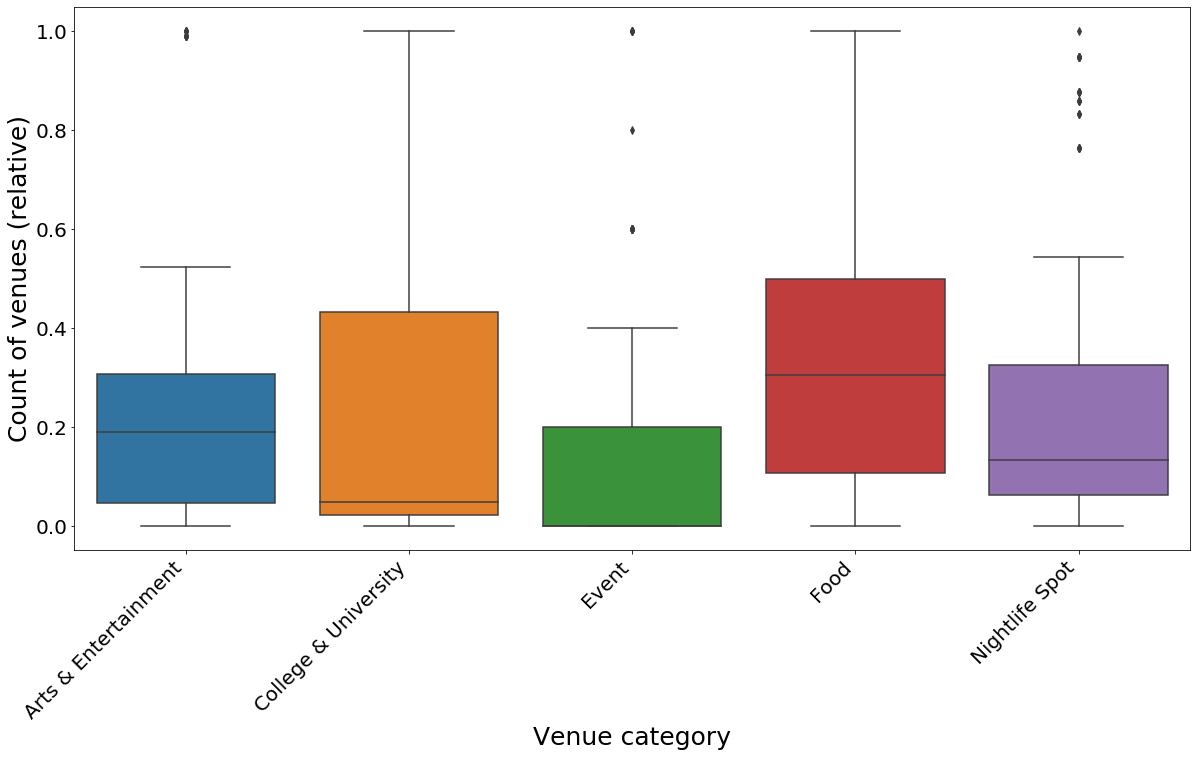

In [93]:
plt.figure(figsize=(20, 10))
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [105]:
# set number of clusters
# kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:2, 1:0, 2:3, 3:1}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

stations_clusters_df = station_venues_df.copy()
stations_clusters_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df = cluster_df.copy()
stations_clusters_minmax_df['Cluster'] = kmeans_labels
stations_clusters_minmax_df['Station'] = station_new['Station']

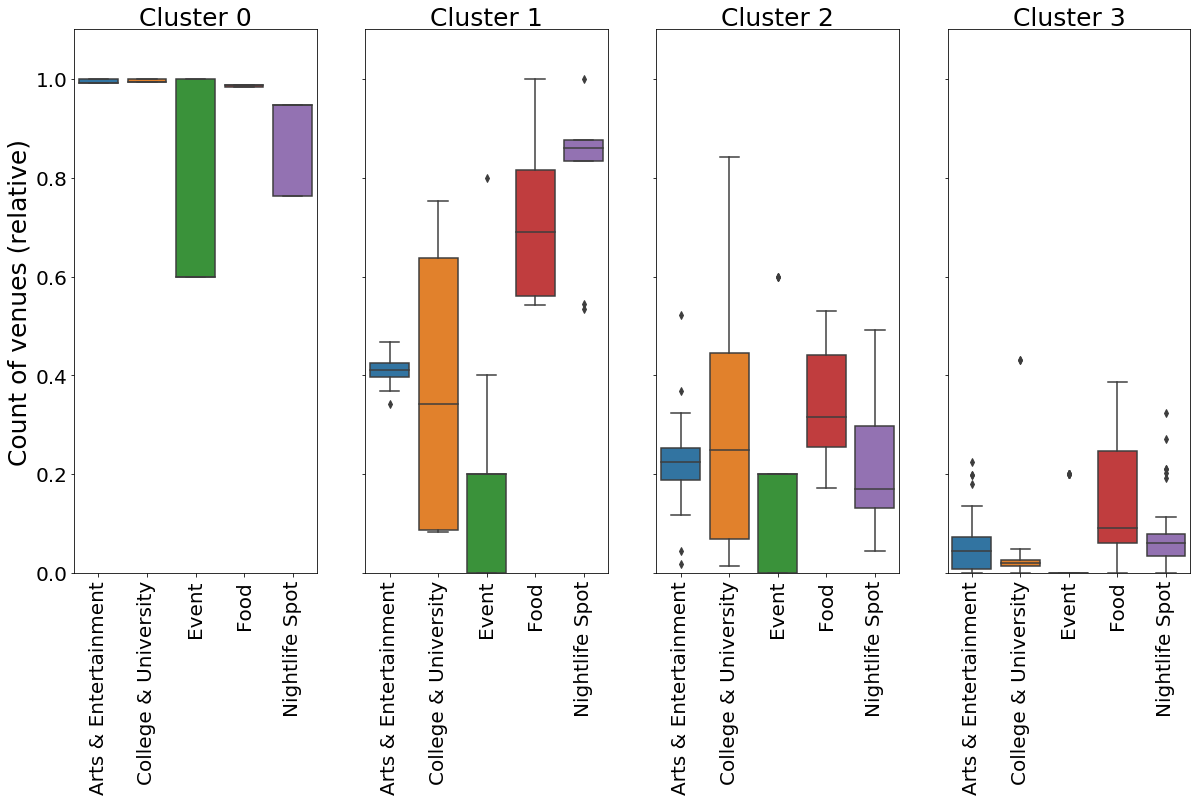

In [106]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = stations_clusters_minmax_df[stations_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [153]:
###### get the data of all categories to define if it's a food venue
# url_cate= url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET, 
#     VERSION)
# res_cate = requests.get(url_cate).json()

# cdict=[]
# ddict=[]
# for level1 in res_cate['response']['categories']:
#     for level2 in level1['categories']:
#         cdict.append([level1['name'],level2['name']])
#         if len(level2['categories'])>0:
#             for level3 in level2['categories']:
#                 ddict.append([level2['name'],level3['name']])
                
# cdf=pd.DataFrame(cdict,columns=['level1','level2'])
# ddf=pd.DataFrame(ddict,columns=['level2','level3'])
# catedf=pd.merge(cdf,ddf,on='level2',how='outer')
# catedf.to_csv('category.csv')

In [20]:
catedf= pd.read_csv('category.csv', index_col=0)
catedf

level1                  level2 level3
0    Arts & Entertainment            Amphitheater    NaN
1    Arts & Entertainment                Aquarium    NaN
2    Arts & Entertainment                  Arcade    NaN
3    Arts & Entertainment             Art Gallery    NaN
4    Arts & Entertainment           Bowling Alley    NaN
..                    ...                     ...    ...
767    Travel & Transport           Train Station  Train
768    Travel & Transport            Tram Station    NaN
769    Travel & Transport  Transportation Service    NaN
770    Travel & Transport           Travel Lounge    NaN
771    Travel & Transport                  Tunnel    NaN

[772 rows x 3 columns]

In [21]:
###### get Nearby Venues
def getNearbyVenues(names, latitudes, longitudes, radius=2000,Limit=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], 
            v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                  'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [23]:
chicago_venues = getNearbyVenues(names=station_new['Station'],latitudes=station_new['latitude'],longitudes=station_new['longitude'])
print(chicago_venues.shape)
chicago_venues.head()

KeyError: 'groups'

In [149]:
# chicago_venues.to_csv('chicago_venues')
chicago_venues = pd.read_csv('chicago_venues.csv',index_col=0)
chicago_venues

Station  Neighborhood Latitude  Neighborhood Longitude  \
0             O'Hare              41.973101              -87.906768   
1             O'Hare              41.973101              -87.906768   
2             O'Hare              41.973101              -87.906768   
3             O'Hare              41.973101              -87.906768   
4             O'Hare              41.973101              -87.906768   
...              ...                    ...                     ...   
11132  Oakton–Skokie              42.306497              -87.872476   
11133  Oakton–Skokie              42.306497              -87.872476   
11134  Oakton–Skokie              42.306497              -87.872476   
11135  Oakton–Skokie              42.306497              -87.872476   
11136  Oakton–Skokie              42.306497              -87.872476   

                                   Venue  Venue Latitude  Venue Longitude  \
0                  Garrett Popcorn Shops       41.976047       -87.902024   
1      American Airlines Flagship Lounge       41.974533       -87.899623   
2        Tortas Frontera by Rick Bayless       41.975421       -87.900147   
3                               Argo Tea       41.975817       -87.902590   
4                       O'Hare Yoga Room       41.975487       -87.903245   
...                                  ...             ...              ...   
11132                       Big Ed's BBQ       42.319119       -87.862573   
11133              North Chicago Liquors       42.319730       -87.863782   
11134                          Taco Bell       42.318699       -87.866593   
11135                     Sanctuary Park       42.291069       -87.880238   
11136                       Freedom Hall       42.301250       -87.849292   

             Venue Category  
0               Snack Place  
1            Airport Lounge  
2        Mexican Restaurant  
3                  Tea Room  
4               Yoga Studio  
...                     ...  
11132   American Restaurant  
11133          Liquor Store  
11134  Fast Food Restaurant  
11135                  Park  
11136  Gym / Fitness Center  

[11137 rows x 7 columns]

In [150]:
# replace Venue Category with level2 category 
chicago_venues1 = pd.merge(chicago_venues, 
                  catedf[['level2', 'level3']],
                  left_on='Venue Category',
                  right_on='level3',
                  how='left')
chicago_venues1.loc[chicago_venues1['level2'].isna(),'level2']=chicago_venues1['Venue Category']
chicago_venues1=chicago_venues1.drop(columns=['level3'])
chicago_venues1=chicago_venues1.rename(columns={
    'Venue Category':'Venue Category_temp',
    'level2':'Venue Category'
})
chicago_venues1 = chicago_venues1.drop_duplicates(keep=False)
chicago_venues1.head()

Station  Neighborhood Latitude  Neighborhood Longitude  \
0  O'Hare              41.973101              -87.906768   
1  O'Hare              41.973101              -87.906768   
2  O'Hare              41.973101              -87.906768   
3  O'Hare              41.973101              -87.906768   
4  O'Hare              41.973101              -87.906768   

                               Venue  Venue Latitude  Venue Longitude  \
0              Garrett Popcorn Shops       41.976047       -87.902024   
1  American Airlines Flagship Lounge       41.974533       -87.899623   
2    Tortas Frontera by Rick Bayless       41.975421       -87.900147   
3                           Argo Tea       41.975817       -87.902590   
4                   O'Hare Yoga Room       41.975487       -87.903245   

  Venue Category_temp      Venue Category  
0         Snack Place         Snack Place  
1      Airport Lounge             Airport  
2  Mexican Restaurant  Mexican Restaurant  
3            Tea Room            Tea Room  
4         Yoga Studio         Yoga Studio

In [151]:
###### filter the different venue category to remain only 2nd level categories
chicago_venues1=pd.merge(chicago_venues1,catedf[['level1', 'level2']],
         left_on='Venue Category',
                  right_on='level2',
                  how='left')
chicago_venues2=chicago_venues1.drop(columns=['level1','level2','Venue Category_temp'])
chicago_venues2=chicago_venues2.drop_duplicates(keep=False)

In [152]:
chicago_venues2.head()
# (4289, 7)

Station  Neighborhood Latitude  Neighborhood Longitude  \
0   O'Hare              41.973101              -87.906768   
14  O'Hare              41.973101              -87.906768   
15  O'Hare              41.973101              -87.906768   
16  O'Hare              41.973101              -87.906768   
22  O'Hare              41.973101              -87.906768   

                    Venue  Venue Latitude  Venue Longitude  Venue Category  
0   Garrett Popcorn Shops       41.976047       -87.902024     Snack Place  
14               Argo Tea       41.975817       -87.902590        Tea Room  
15       O'Hare Yoga Room       41.975487       -87.903245     Yoga Studio  
16  Garrett Popcorn Shops       41.978830       -87.906890     Snack Place  
22   Vosges Haut Chocolat       41.975431       -87.900601  Chocolate Shop

In [153]:
chicago_venues2.groupby("Venue Category")['Venue'].count().nlargest(20)

Venue Category
Coffee Shop             279
Pizza Place             217
Park                    211
American Restaurant     191
Sandwich Place          183
Bakery                  118
Café                    107
Fast Food Restaurant    103
Breakfast Spot           95
Seafood Restaurant       87
Sushi Restaurant         84
Donut Shop               82
Gym                      80
Fried Chicken Joint      73
Discount Store           69
Lounge                   62
Brewery                  60
Diner                    59
Burger Joint             58
Art Gallery              56
Name: Venue, dtype: int64

In [154]:
map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# add markers to map
for lat, lng, station,venue in zip(chicago_venues2['Venue Latitude'], 
                                           chicago_venues2['Venue Longitude'], 
                                            chicago_venues2['Station'], 
                                            chicago_venues2['Venue']):
    label = '{},{}'.format(station,
                              venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_chicago)  

map_chicago

In [155]:
###### select only in food subsidiary records
chicago_venues3=pd.merge(chicago_venues2,catedf,
                         left_on='Venue Category',
                         right_on= 'level2',
                         how='left')

In [117]:
chicago_venues3.head()

Station  Neighborhood Latitude  Neighborhood Longitude  \
0  O'Hare              41.973101              -87.906768   
1  O'Hare              41.973101              -87.906768   
2  O'Hare              41.973101              -87.906768   
3  O'Hare              41.973101              -87.906768   
4  O'Hare              41.973101              -87.906768   

                   Venue  Venue Latitude  Venue Longitude  Venue Category  \
0  Garrett Popcorn Shops       41.976047       -87.902024     Snack Place   
1               Argo Tea       41.975817       -87.902590        Tea Room   
2       O'Hare Yoga Room       41.975487       -87.903245     Yoga Studio   
3  Garrett Popcorn Shops       41.978830       -87.906890     Snack Place   
4   Vosges Haut Chocolat       41.975431       -87.900601  Chocolate Shop   

           level1          level2 level3  
0            Food     Snack Place    NaN  
1            Food        Tea Room    NaN  
2             NaN             NaN    NaN  
3            Food     Snack Place    NaN  
4  Shop & Service  Chocolate Shop    NaN

In [156]:
chicago_venues3['level1'].value_counts()

Food                           2363
Shop & Service                  848
Outdoors & Recreation           400
Arts & Entertainment            166
Nightlife Spot                  130
Travel & Transport               40
Professional & Other Places      29
College & University             22
Name: level1, dtype: int64

In [157]:
# chicago_venues3=chicago_venues3[chicago_venues3['level1']=='Arts & Entertainment']
chicago_venues3=chicago_venues3[chicago_venues3['level1']=='Shop & Service']

In [158]:
chicago_venues3

Station  Neighborhood Latitude  Neighborhood Longitude  \
4            O'Hare              41.973101              -87.906768   
10           O'Hare              41.973101              -87.906768   
22           O'Hare              41.973101              -87.906768   
26           O'Hare              41.973101              -87.906768   
27           O'Hare              41.973101              -87.906768   
...             ...                    ...                     ...   
4275  Oakton–Skokie              42.306497              -87.872476   
4278  Oakton–Skokie              42.306497              -87.872476   
4280  Oakton–Skokie              42.306497              -87.872476   
4281  Oakton–Skokie              42.306497              -87.872476   
4285  Oakton–Skokie              42.306497              -87.872476   

                            Venue  Venue Latitude  Venue Longitude  \
4            Vosges Haut Chocolat       41.975431       -87.900601   
10           Vosges Haut Chocolat       41.978007       -87.907121   
22                Planet Smoothie       41.977162       -87.910574   
26                  Smoothie King       41.977611       -87.907204   
27           Terminal Getaway Spa       41.976058       -87.902164   
...                           ...             ...              ...   
4275                  Burkey Mall       42.312179       -87.864245   
4278             North Chicago BP       42.319901       -87.867031   
4280   NEX/Commissary Parking Lot       42.312588       -87.864067   
4281     Great Lakes Credit Union       42.313150       -87.862870   
4285  North Chicago Beauty Supply       42.319827       -87.865506   

        Venue Category          level1            level2 level3  
4       Chocolate Shop  Shop & Service    Chocolate Shop    NaN  
10      Chocolate Shop  Shop & Service    Chocolate Shop    NaN  
22       Smoothie Shop  Shop & Service     Smoothie Shop    NaN  
26       Smoothie Shop  Shop & Service     Smoothie Shop    NaN  
27                 Spa  Shop & Service               Spa    NaN  
...                ...             ...               ...    ...  
4275     Shopping Mall  Shop & Service     Shopping Mall    NaN  
4278       Gas Station  Shop & Service       Gas Station    NaN  
4280  Department Store  Shop & Service  Department Store    NaN  
4281      Credit Union  Shop & Service      Credit Union    NaN  
4285    Cosmetics Shop  Shop & Service    Cosmetics Shop    NaN  

[848 rows x 10 columns]

In [159]:
print(" number of level 1 categories: " ,len(chicago_venues['Venue Category'].unique()))
print(" number of level 2 categories: " ,len(chicago_venues3['Venue Category'].unique()))
print(chicago_venues3.shape)

 number of level 1 categories:  314
 number of level 2 categories:  68
(848, 10)


## Classification

In [160]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues3[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues3['Station'] 

# move neighborhood column to the first column
columns = chicago_onehot.columns.values.tolist()
columns.sort(key = 'Neighborhood'.__eq__)
chicago_onehot = chicago_onehot[columns]

chicago_grouped = chicago_onehot.groupby('Neighborhood').sum().reset_index()
chicago_grouped.head()

Neighborhood  ATM  Adult Boutique  Antique Shop  \
0                  18th    0               0             0   
1           35th/Archer    0               0             0   
2  35th–Bronzeville–IIT    0               0             0   
3                  43rd    0               0             0   
4                  51st    0               0             0   

   Arts & Crafts Store  Automotive Shop  Bank  Big Box Store  Bike Shop  \
0                    0                0     0              0          0   
1                    0                0     0              1          0   
2                    0                0     1              0          0   
3                    0                0     1              0          0   
4                    0                0     1              0          0   

   Board Shop  ...  Sporting Goods Shop  Stationery Store  Storage Facility  \
0           0  ...                    0                 0                 0   
1           0  ...                    0                 0                 0   
2           0  ...                    1                 0                 0   
3           0  ...                    0                 0                 0   
4           0  ...                    0                 0                 0   

   Supplement Shop  Tattoo Parlor  Thrift / Vintage Store  Toy / Game Store  \
0                0              0                       0                 0   
1                1              0                       1                 0   
2                0              0                       0                 0   
3                0              0                       0                 0   
4                0              0                       0                 0   

   Video Game Store  Video Store  Warehouse Store  
0                 0            0                1  
1                 1            3                0  
2                 1            1                0  
3                 0            0                0  
4                 0            0                0  

[5 rows x 69 columns]

In [161]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [162]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0                  18th       Warehouse Store             Bookstore   
1           35th/Archer           Video Store           Gas Station   
2  35th–Bronzeville–IIT     Convenience Store             Gift Shop   
3                  43rd        Discount Store     Convenience Store   
4                  51st        Discount Store     Convenience Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Cosmetics Shop          Antique Shop     Currency Exchange   
1         Big Box Store        Discount Store    Salon / Barbershop   
2   Sporting Goods Shop             Pet Store              Pharmacy   
3                  Bank              Pharmacy                   Spa   
4                  Bank              Pharmacy                   Spa   

  6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  
0            Hobby Shop  Health & Beauty Service        Hardware Store  
1         Shopping Mall        Mobile Phone Shop    Miscellaneous Shop  
2    Salon / Barbershop           Shipping Store                   Spa  
3     Mobile Phone Shop           Cosmetics Shop           Gas Station  
4     Mobile Phone Shop           Cosmetics Shop           Gas Station

### Clusters

The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.


In [163]:
chicago_grouped

Neighborhood  ATM  Adult Boutique  Antique Shop  \
0                   18th    0               0             0   
1            35th/Archer    0               0             0   
2   35th–Bronzeville–IIT    0               0             0   
3                   43rd    0               0             0   
4                   51st    0               0             0   
..                   ...  ...             ...           ...   
84          Washington Ⓣ    0               0             0   
85   Washington/Wells  Ⓣ    0               0             0   
86    Washington/​Wabash    0               0             0   
87            Wellington    0               0             0   
88             Wilson  Ⓣ    0               0             0   

    Arts & Crafts Store  Automotive Shop  Bank  Big Box Store  Bike Shop  \
0                     0                0     0              0          0   
1                     0                0     0              1          0   
2                     0                0     1              0          0   
3                     0                0     1              0          0   
4                     0                0     1              0          0   
..                  ...              ...   ...            ...        ...   
84                    1                0     0              0          0   
85                    1                0     0              0          0   
86                    1                0     0              0          0   
87                    1                0     0              0          0   
88                    0                0     0              1          0   

    Board Shop  ...  Sporting Goods Shop  Stationery Store  Storage Facility  \
0            0  ...                    0                 0                 0   
1            0  ...                    0                 0                 0   
2            0  ...                    1                 0                 0   
3            0  ...                    0                 0                 0   
4            0  ...                    0                 0                 0   
..         ...  ...                  ...               ...               ...   
84           0  ...                    0                 0                 0   
85           0  ...                    0                 0                 0   
86           0  ...                    0                 0                 0   
87           0  ...                    1                 0                 0   
88           0  ...                    0                 0                 0   

    Supplement Shop  Tattoo Parlor  Thrift / Vintage Store  Toy / Game Store  \
0                 0              0                       0                 0   
1                 1              0                       1                 0   
2                 0              0                       0                 0   
3                 0              0                       0                 0   
4                 0              0                       0                 0   
..              ...            ...                     ...               ...   
84                0              0                       0                 1   
85                0              0                       0                 0   
86                0              0                       0                 0   
87                0              1                       0                 0   
88                0              2                       0                 0   

    Video Game Store  Video Store  Warehouse Store  
0                  0            0                1  
1                  1            3                0  
2                  1            1                0  
3                  0            0                0  
4                  0            0                0  
..               ...          ...              ...  
84                 0            0                

In [129]:
sum_of_squared_distances = []
chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(chicago_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  import sys


28 29 30 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  import sys


31 32 33 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (33). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (34). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (35). Possibly due to duplicate points in X.
  import sys


34 35 36 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (36). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  import sys


37 38 39 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  import sys


40 41 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (41). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  import sys


42 43 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (43). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (44). Possibly due to duplicate points in X.
  import sys


44 45 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (45). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (46). Possibly due to duplicate points in X.
  import sys


46 47 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (47). Possibly due to duplicate points in X.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (48). Possibly due to duplicate points in X.
  import sys


48 49 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  import sys


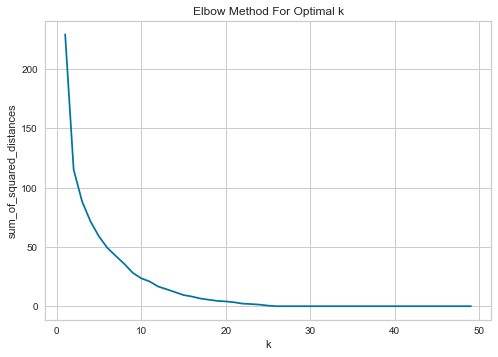

In [164]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [165]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(chicago_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(chicago_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  


28 29 30 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  


31 32 33 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (33). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (34). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (35). Possibly due to duplicate points in X.
  


34 35 36 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (36). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  


37 38 39 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  


40 41 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (41). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  


42 43 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (43). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (44). Possibly due to duplicate points in X.
  


44 45 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (45). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (46). Possibly due to duplicate points in X.
  


46 47 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (47). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (48). Possibly due to duplicate points in X.
  


48 49 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  


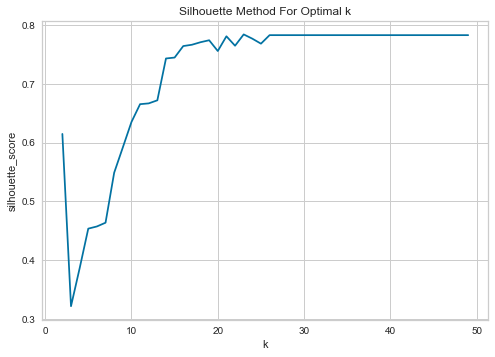

In [166]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

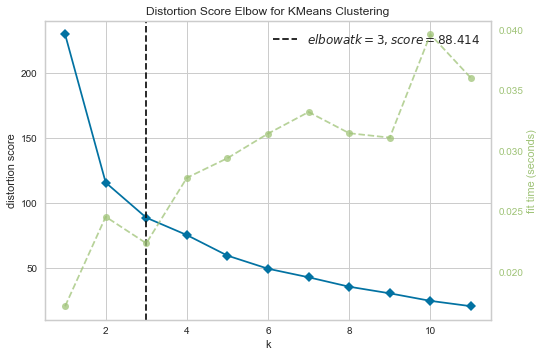

In [167]:
# !pip install yellowbrick
###### select K clusters
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# KElbowVisual4ize
visualizer = KElbowVisualizer(kmeans, k=(1, 12), metric='distortion')
visualizer.fit(chicago_grouped_clustering)        
visualizer.show()

###### the cluster should be 3

In [168]:
# set number of clusters
kclusters = 3

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1,).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
#len(kmeans.labels_)#=16
chicago_merged = neighborhoods_venues_sorted

# add clustering labels
chicago_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = pd.merge(station_new, chicago_merged,left_on='Station',right_on='Neighborhood')
chicago_merged.groupby('Cluster Labels')['Station'].count()

Cluster Labels
0    11
1    68
2    10
Name: Station, dtype: int64

In [169]:
chicago_merged

Unnamed: 0          Station   Lines                           Transfers  \
0            0           O'Hare    Blue  O'Hare: ATS Airport Transit System   
1            1         Rosemont    Blue                                   —   
2            2       Cumberland    Blue                                   —   
3            4   Jefferson Park    Blue                        Metra: UP-NW   
4            8          Belmont    Blue                                   —   
..         ...              ...     ...                                 ...   
84         140             79th     Red                                   —   
85         141             87th     Red                                   —   
86         142    95th/Dan Ryan     Red                                   —   
87         143  Dempster–Skokie  Yellow                                   —   
88         144    Oakton–Skokie  Yellow                                   —   

          Location                  Opened          Structure   latitude  \
0           O'Hare   September 3, 1984[12]        Underground  41.973101   
1         Rosemont   February 27, 1983[13]  Expressway median  41.995343   
2           O'Hare   February 27, 1983[13]  Expressway median  41.973101   
3   Jefferson Park    February 1, 1970[14]  Expressway median  41.969738   
4         Avondale    February 1, 1970[14]        Underground  41.938921   
..             ...                     ...                ...        ...   
84         Chatham  September 28, 1969[68]  Expressway median  41.741145   
85         Chatham  September 28, 1969[68]  Expressway median  41.741145   
86        Roseland  September 28, 1969[68]  Expressway median  41.701979   
87          Skokie      March 28, 1925[69]           At-grade  42.301387   
88          Skokie      March 28, 1925[70]           At-grade  42.306497   

    longitude     Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
0  -87.906768           O'Hare         Smoothie Shop           Chocolate Shop   
1  -87.733745         Rosemont     Mobile Phone Shop                 Pharmacy   
2  -87.906768       Cumberland         Smoothie Shop           Chocolate Shop   
3  -87.763118   Jefferson Park           Video Store                     Bank   
4  -87.711168          Belmont        Discount Store  Health & Beauty Service   
..        ...              ...                   ...                      ...   
84 -87.612548             79th      Video Game Store        Mobile Phone Shop   
85 -87.612548             87th      Video Game Store        Mobile Phone Shop   
86 -87.625881    95th/Dan Ryan        Discount Store           Cosmetics Shop   
87 -87.871313  Dempster–Skokie           Video Store              Gas Station   
88 -87.872476    Oakton–Skokie           Video Store              Gas Station   

   3rd Most Common Venue 4th Most Common Venue       5th Most Common Venue  \
0                    Spa        Massage Studio              Shipping Store   
1        Automotive Shop        Shipping Store                 Gas Station   
2                    Spa        Massage Studio              Shipping Store   
3               Pharmacy             Gift Shop           Mobile Phone Shop   
4              Bookstore            Hobby Shop                   Gift Shop   
..                   ...                   ...                         ...   
84                  Bank        Discount Store              Hardware Store   
85                  Bank        Discount Store              Hardware Store   
86     Currency Exchange                  Bank  Construction & Landscaping   
87      Department Store         Shopping Mall                Credit Union   
88      Department Store        Discount Store              Cosmetics Shop   

      6th Most Common Venue          7th Most Common Venue  \
0         Mobile Phone Shop              Electronics Store   
1                Nail Salon                 Cosmetics Shop   
2         Mobile Phone Shop              Elect

In [170]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[41.8781, -87.6298], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# color = [colors.rgb2hex(i) for i in colors_array]
color=['red','green','blue']


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color[cluster-1],
        fill=True,
        fill_color=color[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [171]:
grouped = chicago_merged[['Neighborhood',
                     'Cluster Labels',
                     '1st Most Common Venue', 
                     '2nd Most Common Venue', 
                     '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue',
                    '6th Most Common Venue'
                    ]]

grouped.loc[:, 'Top Venues'] = grouped.apply(lambda x: ", ".join(x.iloc[2:5]), axis=1)
grouped = grouped.drop(['1st Most Common Venue', 
                        '2nd Most Common Venue', 
                        '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue','6th Most Common Venue'], axis=1)
def mix(group):
    return ', '.join(group['Top Venues'].tolist())
top_venues = grouped.groupby('Cluster Labels').apply(mix)

c0dist = grouped.groupby('Cluster Labels').get_group(0).shape[0]
clr0 = pd.Series(top_venues[0].split(', '), name='Cluster 0').value_counts().nlargest(6)/c0dist
c1dist = grouped.groupby('Cluster Labels').get_group(1).shape[0]
clr1 = pd.Series(top_venues[1].split(', '), name='Cluster 1').value_counts().nlargest(6)/c1dist
c2dist = grouped.groupby('Cluster Labels').get_group(2).shape[0]
clr2 = pd.Series(top_venues[2].split(', '), name='Cluster 2').value_counts().nlargest(6)/c2dist

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

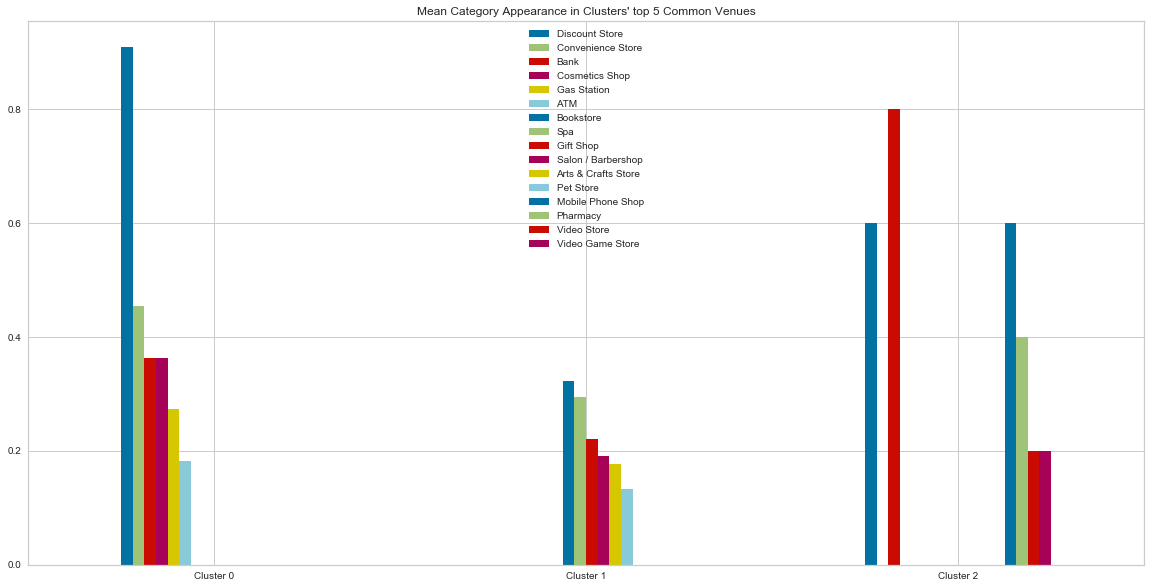

In [172]:
ax = pd.concat([clr0,clr1,clr2], sort=False, axis=1).transpose().plot(kind='bar', figsize=(20, 10))
plt.title("Mean Category Appearance in Clusters' top 5 Common Venues") 
plt.xticks(rotation=0)

In [173]:
chicago_merged = chicago_merged.drop(columns=['Transfers',"Opened", "Structure"],axis =1)

In [174]:
cluster_0 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[1:13]]
cluster_0 = cluster_0
cluster_0.head(5)

Station  Lines                           Location   latitude  \
36      Laramie  Green                             Austin  41.887876   
42      Indiana  Green                    Grand Boulevard  41.813923   
43         43rd  Green                    Grand Boulevard  41.813923   
44         51st  Green  Grand Boulevard / Washington Park  41.813923   
45  Garfield  Ⓣ  Green                    Washington Park  41.792534   

    longitude Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
36 -87.764851      Laramie     Convenience Store        Discount Store   
42 -87.617272      Indiana        Discount Store     Convenience Store   
43 -87.617272         43rd        Discount Store     Convenience Store   
44 -87.617272         51st        Discount Store     Convenience Store   
45 -87.618105  Garfield  Ⓣ             Bookstore        Discount Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
36              Pharmacy                   ATM            Hobby Shop   
42                  Bank              Pharmacy                   Spa   
43                  Bank              Pharmacy                   Spa   
44                  Bank              Pharmacy                   Spa   
45        Cosmetics Shop      Video Game Store           Gas Station   

   6th Most Common Venue  
36      Toy / Game Store  
42     Mobile Phone Shop  
43     Mobile Phone Shop  
44     Mobile Phone Shop  
45                  Bank

In [175]:
required_column_indices = [3,7,8]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [3,7,8]

for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Grand Boulevard                      2
Englewood                            1
Austin                               1
Grand Boulevard / Washington Park    1
Washington Park                      1
Greater Grand Crossing               1
Roseland                             1
Skokie                               1
Cicero                               1
West Englewood                       1
Name: Location, dtype: int64
---------------------------------------------
Discount Store       7
Gas Station          1
Video Store          1
Convenience Store    1
Bookstore            1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Convenience Store    4
Discount Store       3
Cosmetics Shop       2
Gas Station          2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [176]:
cluster_1 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[1:16]]
cluster_1 = cluster_1
cluster_1.head(5)

Station Lines                    Location   latitude  longitude  \
0        O'Hare  Blue                      O'Hare  41.973101 -87.906768   
2    Cumberland  Blue                      O'Hare  41.973101 -87.906768   
4       Belmont  Blue                    Avondale  41.938921 -87.711168   
5  Logan Square  Blue                Logan Square  41.928568 -87.706793   
6      Division  Blue  Wicker Park / Noble Square  41.905809 -87.672125   

   Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
0        O'Hare         Smoothie Shop           Chocolate Shop   
2    Cumberland         Smoothie Shop           Chocolate Shop   
4       Belmont        Discount Store  Health & Beauty Service   
5  Logan Square      Toy / Game Store  Health & Beauty Service   
6      Division             Bookstore              Record Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Spa        Massage Studio        Shipping Store   
2                   Spa        Massage Studio        Shipping Store   
4             Bookstore            Hobby Shop             Gift Shop   
5            Board Shop            Print Shop            Comic Shop   
6    Salon / Barbershop             Bike Shop           Flower Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Mobile Phone Shop     Electronics Store         Souvenir Shop   
2       Mobile Phone Shop     Electronics Store         Souvenir Shop   
4  Thrift / Vintage Store         Tattoo Parlor           Gaming Cafe   
5               Bookstore           Flower Shop             Gift Shop   
6              Nail Salon                   Spa             Pet Store   

   Cluster Labels  
0               1  
2               1  
4               1  
5               1  
6               1

In [177]:
required_column_indices = [3,7,8]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [3,7,8]

for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

The Loop                      10
Evanston                       6
Rogers Park                    4
Edgewater                      4
Lake View                      4
Near West Side                 4
Near North Side                3
Lincoln Park                   3
O'Hare                         2
Uptown                         2
Woodlawn                       2
Albany Park                    2
Near South Side                1
Avondale                       1
Logan Square                   1
Fuller Park                    1
Skokie                         1
Old Town                       1
McKinley Park                  1
Wicker Park / Noble Square     1
South Loop                     1
West Loop                      1
Lincoln Square                 1
Greektown                      1
Roscoe Village                 1
Illinois Medical District      1
Oak Park / Forest Park         1
Little Vietnam                 1
Wilmette                       1
Bronzeville                    1
Pilsen    

In [178]:
cluster_2 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[1:16]]
cluster_2 = cluster_2
cluster_2.head(5)

Station  Lines            Location   latitude  \
1                          Rosemont   Blue            Rosemont  41.995343   
3                    Jefferson Park   Blue      Jefferson Park  41.969738   
13                     Kedzie–Homan   Blue  East Garfield Park  41.880866   
14                      Forest Park   Blue         Forest Park  41.727329   
37  Conservatory–Central Park Drive  Green  East Garfield Park  41.880866   

    longitude                     Neighborhood 1st Most Common Venue  \
1  -87.733745                         Rosemont     Mobile Phone Shop   
3  -87.763118                   Jefferson Park           Video Store   
13 -87.702833                     Kedzie–Homan                  Bank   
14 -87.616704                      Forest Park      Department Store   
37 -87.702833  Conservatory–Central Park Drive                  Bank   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1               Pharmacy       Automotive Shop        Shipping Store   
3                   Bank              Pharmacy             Gift Shop   
13     Mobile Phone Shop        Discount Store              Pharmacy   
14        Discount Store     Mobile Phone Shop              Pharmacy   
37     Mobile Phone Shop        Discount Store              Pharmacy   

   5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
1            Gas Station            Nail Salon           Cosmetics Shop   
3      Mobile Phone Shop             Bike Shop           Discount Store   
13           Pet Service      Business Service      Sporting Goods Shop   
14           Gas Station   Sporting Goods Shop  Health & Beauty Service   
37           Pet Service      Business Service      Sporting Goods Shop   

   8th Most Common Venue  Cluster Labels  
1       Department Store               2  
3             Hobby Shop               2  
13                   ATM               2  
14          Optical Shop               2  
37                   ATM               2

In [179]:
required_column_indices = [3,7,8]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [3,7,8]

for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chatham               2
North Lawndale        2
East Garfield Park    2
Garfield Ridge        1
Rosemont              1
Forest Park           1
Jefferson Park        1
Name: Location, dtype: int64
---------------------------------------------
Bank                 4
Video Game Store     2
Department Store     1
Mobile Phone Shop    1
Video Store          1
Discount Store       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Mobile Phone Shop    4
Discount Store       3
Bank                 1
Video Store          1
Pharmacy             1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
